In [4]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/credit-risk'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import pandas as pd

df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-risk-dataset/credit_risk.csv'

In [2]:
import pandas as pd

df = pd.read_csv(r"/kaggle/input/credit-risk/credit_risk_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-risk/credit_risk_dataset.csv'

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [6]:
df = df.dropna()

In [7]:
# Separate X & y
X =df.drop("loan_status",axis = 1)
y = df["loan_status"]

In [8]:
# Separate Train set and Test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=13,stratify =y)

In [9]:
Cat_cols = X_train[["person_home_ownership","loan_intent","cb_person_default_on_file","loan_grade"]]
numerical_col = X_train.select_dtypes(exclude = ["object","category"])

In [10]:
le = LabelEncoder()
for i in Cat_cols.columns:
    X_train[i] = le.fit_transform(X_train[i])

In [11]:
DT = DecisionTreeClassifier(max_depth= 10,class_weight="balanced")

Model = DT.fit(X_train,y_train)

In [12]:
Model.score(X_train,y_train)

0.9246732515215006

In [13]:
DT = DecisionTreeClassifier(max_depth= None,class_weight="balanced")

Model = DT.fit(X_train,y_train)

In [14]:
Model.score(X_train,y_train)

1.0

In [15]:
for i in Cat_cols.columns:
    X_test[i] = le.fit_transform(X_test[i])

In [17]:

rf_model = RandomForestClassifier(
    n_estimators=50,       
    max_features='sqrt',    
    bootstrap=True,         
    random_state=42,
    class_weight = "balanced"
)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print("Train Accuracy",rf_model.score(X_train, y_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Train Accuracy 0.9995510326249626
Accuracy: 0.9290037243947858

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      6731
           1       0.96      0.70      0.81      1861

    accuracy                           0.93      8592
   macro avg       0.94      0.85      0.88      8592
weighted avg       0.93      0.93      0.92      8592



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score



rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 110, 125,135, 200],        
    'max_depth': [None, 9, 10],            
    'max_features': [ 'sqrt', 'log2'], 
    'min_samples_split': [ 5, 10],           
    'min_samples_leaf': [ 2, 4],             
    'bootstrap': [True, False]                 
}




random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50, 
    cv=5,
    n_jobs=-1,           
    verbose=3,
    random_state = 42,
    scoring='accuracy'
)


random_search.fit(X_train, y_train)


print("Best Parameters:\n", random_search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.929 total time=   6.1s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=110;, score=0.928 total time=   3.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=135;, score=0.916 total time=   2.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=135;, score=0.925 total time=   2.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.923 total time=   4.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.918 total time=   4.2s
[CV 5/5] END b

In [19]:

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)


print(random_search.best_estimator_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

RandomForestClassifier(bootstrap=False, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=135, random_state=42)
Test Accuracy: 0.9314478584729982


In [20]:
best_rf.score(X_train, y_train)

0.9987029831387808

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6731
           1       0.95      0.72      0.82      1861

    accuracy                           0.93      8592
   macro avg       0.94      0.85      0.89      8592
weighted avg       0.93      0.93      0.93      8592



In [22]:
rf = RandomForestClassifier(
    n_estimators=135,
    max_depth=13,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))
print(classification_report(y_pred, y_test))


Train Accuracy: 0.9435298812730719
Test Accuracy: 0.9266759776536313
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7239
           1       0.69      0.95      0.80      1353

    accuracy                           0.93      8592
   macro avg       0.84      0.94      0.88      8592
weighted avg       0.94      0.93      0.93      8592



In [23]:
from sklearn.metrics import precision_score


y_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1


threshold = 0.4
y_pred_threshold = (y_probs >= threshold).astype(int)

print(rf.score(X_train,y_train))


print(accuracy_score(y_pred_threshold,y_test))
print("Precision (class 1):", precision_score(y_test, y_pred_threshold, pos_label=1))
print(classification_report(y_test, y_pred_threshold))


0.9435298812730719
0.9228351955307262
Precision (class 1): 0.9080381471389646
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6731
           1       0.91      0.72      0.80      1861

    accuracy                           0.92      8592
   macro avg       0.92      0.85      0.88      8592
weighted avg       0.92      0.92      0.92      8592


[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=110;, score=0.927 total time=   4.3s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=110;, score=0.925 total time=   2.2s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.921 total time=   2.6s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=135;, score

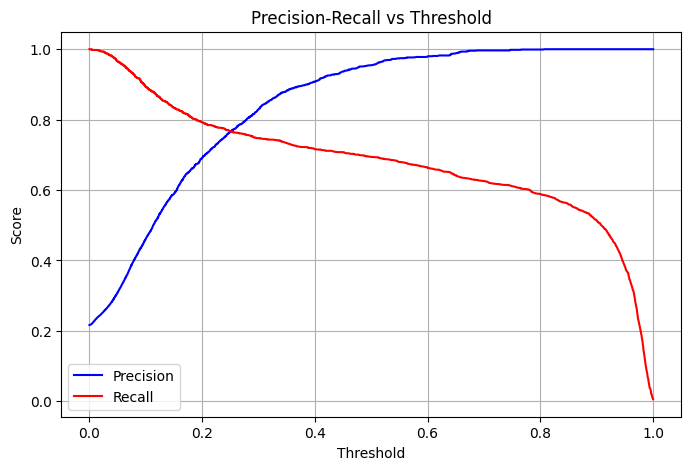

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


y_probs = rf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision', color='b')
plt.plot(thresholds, recalls[:-1], label='Recall', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()
